In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
df = pd.read_csv("../../data/raw/mex-a3t/train_aggressiveness.csv")

In [3]:
df.head()

,Id,Category,Text
0,1,0,Soy el Clint Eastwood de los Puentes de Madiso...
1,2,0,"Actualmente ya pasó de moda la pucha joto, aho..."
2,3,0,¿Es cierto esto? Y no me refiero a lo que dijo...
3,4,0,Vuela pega y esquiva... la neta está de la ver...
4,5,0,Mejor puto disfraz de la noche!!!! 👊👊👊Por terc...


In [6]:
df = df.drop("Id", axis=1)

In [7]:
df.head()

,Category,Text
0,0,Soy el Clint Eastwood de los Puentes de Madiso...
1,0,"Actualmente ya pasó de moda la pucha joto, aho..."
2,0,¿Es cierto esto? Y no me refiero a lo que dijo...
3,0,Vuela pega y esquiva... la neta está de la ver...
4,0,Mejor puto disfraz de la noche!!!! 👊👊👊Por terc...


<AxesSubplot:xlabel='Category', ylabel='count'>

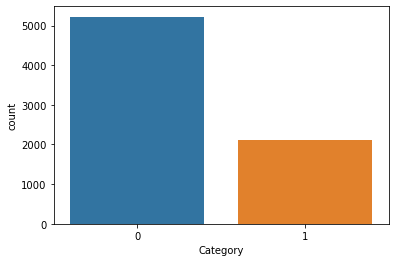

In [9]:
# How balanced is the dataset?

sns.countplot(x="Category", data=df)

## Lenght of the Tweets

In [11]:
df["length"] = df.Text.str.len()

Text(0, 0.5, 'Count')

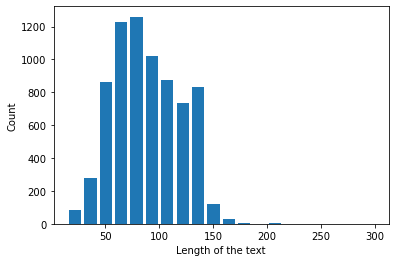

In [13]:
plt.hist(df.length, bins=20, rwidth=0.8)
plt.xlabel('Length of the text')
plt.ylabel('Count')

In [14]:
df[df.length > 200]

,Category,Text,length
1711,1,"@USUARIO @USUARIO Callate el hocico puta, ya ...",300
2718,1,Es si no sabia que habían dado mas caracteres ...,208
3422,1,Ahora recuerdo por que no iba al cine en dias ...,201
4334,1,Putos los que no fueron a ayudar en el temblor...,204


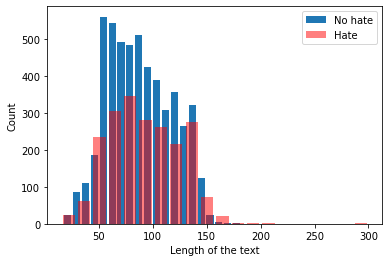

In [23]:
hate = df[df.Category == 1]
no_hate = df[df.Category == 0]

plt.hist(no_hate.length, bins=20, rwidth=0.8, label="No hate")
plt.hist(hate.length, bins=20, rwidth=0.8, label="Hate", alpha=0.5, color='red')
plt.xlabel('Length of the text')
plt.ylabel('Count')
plt.legend(loc="upper right");


## Word count

In [27]:
df['totalwords'] = df['Text'].str.split().str.len()

hate = df[df.Category == 1]
no_hate = df[df.Category == 0]

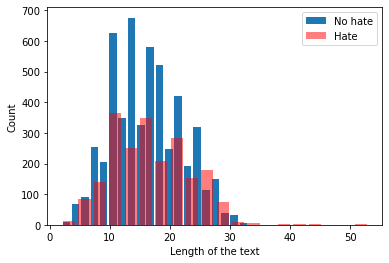

In [28]:
plt.hist(no_hate.totalwords, bins=20, rwidth=0.8, label="No hate")
plt.hist(hate.totalwords, bins=20, rwidth=0.8, label="Hate", alpha=0.5, color='red')
plt.xlabel('Length of the text')
plt.ylabel('Count')
plt.legend(loc="upper right");


## Unique characters

In [29]:
unique_chars = set(list(' '.join(df['Text'].values)))
unique_chars

{'\n',
 ' ',
 '!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z',
 '[',
 '\\',
 ']',
 '_',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 '|',
 '~',
 '\xa0',
 '¡',
 '«',
 '¬',
 '®',
 '¯',
 '°',
 '´',
 '»',
 '¿',
 'Á',
 'Ä',
 'É',
 'Í',
 'Ñ',
 'Ó',
 '×',
 'Ú',
 'Ü',
 'à',
 'á',
 'é',
 'ì',
 'í',
 'ñ',
 'ò',
 'ó',
 '÷',
 'ú',
 'ü',
 'ć',
 'ʺ',
 'ˮ',
 '̶',
 'Θ',
 'π',
 '\u200d',
 '–',
 '—',
 '‘',
 '’',
 '“',
 '”',
 '‟',
 '•',
 '…',
 '‼',
 '⏫',
 '╭',
 '╮',
 '╯',
 '╰',
 '►',
 '☀',
 '☃',
 '☔',
 '☝',
 '☪',
 '☹',
 '☺',
 '♀',
 '♂',
 '♠',
 '♡',
 '♥',
 '⚡',
 '⚽',
 '✅',
 '✊',
 '✋',
 '✌',
 '✔',
 '✨',


## Unique words

In [33]:
def plot_cloud_word(text):
    stopwords = set(STOPWORDS)
    stopwords.update([])

    # Generate a word cloud image
    wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

    # Display the generated image:
    # the matplotlib way:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

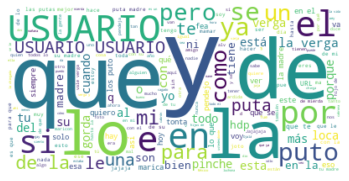

In [34]:
text = " ".join(comment for comment in df.Text)
plot_cloud_word(text)

In [ ]:
text = " ".join(comment for comment in no_.Text)
plot_cloud_word(text)